In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# # To merge 12 months of sales data into a single file
import os
import glob





In [2]:
# selecting working folder
path="/Users/kitaeklee/PycharmProjects/sales/Sales_Data"

# collect all files needed to be combined
all_files = glob.glob(os.path.join(path, "Sales_*.csv"))

# read, concatenate
merged_file = pd.concat((pd.read_csv(f, sep=',') for f in all_files), ignore_index=True)

# export as CSV to the local directory
merged_file.to_csv("/Users/kitaeklee/PycharmProjects/sales/merged_file.csv", index=False)

In [3]:
merged_file


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
# To remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
# # # Data Cleaning: Drop the rows with missing values or categorical values
# Drop rows with null values
merged_file.dropna(subset=['Order ID'], inplace=True, axis=0)
# Reassign the values to merged_file where the values of 'Order date'.str[0:2] are not 'Or' to drop categorical variables
merged_file = merged_file[merged_file['Order Date'].str[0:2] != 'Or']

merged_file.reset_index(inplace=True, drop=True)

In [6]:
#########################################################################
# # # 1. The best month for sales and how much earned in that month

# add an additional column for the month of the Order Date
merged_file['Order Month'] = merged_file['Order Date'].str[:2]
merged_file['Order Month'] = merged_file['Order Month'].astype('int32', copy=False)

# change the data types to float
merged_file['Quantity Ordered'] = merged_file['Quantity Ordered'].astype('float64', copy=False)
merged_file['Price Each'] = merged_file['Price Each'].astype('float64', copy=False)
# Create Sales column
merged_file['sales'] = (merged_file['Quantity Ordered'] * merged_file['Price Each'])

merged_file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
185946,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
185947,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
185948,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [7]:
# sum of 'sales', to each 'Order Month' then max out of all.
best_sales = merged_file.groupby('Order Month')['sales'].sum().max()

# create a new dataframe with months and sales
month_sales = merged_file.groupby('Order Month')['sales'].sum().reset_index()

month_sales

,Order Month,sales
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


Text(0.5, 1.0, 'Total sales in each month')

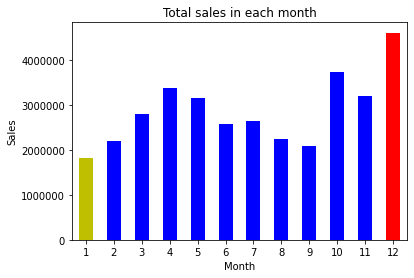

In [8]:
# Visualization

colors = list('ybbbbbbbbbbr')

month_sales.plot(x='Order Month', y='sales', kind='bar', color=colors,
                legend=None)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=360)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total sales in each month')

In [9]:
#########################################################################
# # # 2. Which city had the highest and the lowest sales
# Create a new column for cities
merged_file['city'] = merged_file['Purchase Address'].str.split(",")
merged_file['city'] = merged_file['city'].str.get(1)

# To deal with the duplicates of the name of the cities, create state column
merged_file['state'] = merged_file['Purchase Address'].apply(lambda x: x.split(",")[2])
def split_state(address):
    return address.split(" ")[1]
merged_file['state'] = merged_file['state'].apply(lambda x: split_state(x))
merged_file['city'] = merged_file['city'] + " " + merged_file['state']



merged_file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,city,state
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA,MA
185946,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City NY,NY
185947,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA,CA
185948,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA,CA


In [10]:
# Create Dataframe for sum of sales that grouped by cities and states
sales_sum_city = merged_file.groupby(['city', 'state'])['sales'].sum()
sales_sum_city = sales_sum_city.to_frame()      # convert series into dataframe
sales_sum_city = sales_sum_city.reset_index()
sales_sum_city['sales'] = sales_sum_city['sales'].astype('str')
sales_sum_city['sales'] = sales_sum_city['sales'].apply(lambda x: x.split(".")[0])
sales_sum_city['sales'] = sales_sum_city['sales'].astype('float')

In [11]:
sales_sum_city = sales_sum_city.sort_values(by='sales').reset_index()

sales_sum_city

,index,city,state,sales
0,6,Portland ME,ME,449758.0
1,1,Austin TX,TX,1819581.0
2,7,Portland OR,OR,1870732.0
3,9,Seattle WA,WA,2747755.0
4,3,Dallas TX,TX,2767975.0
5,0,Atlanta GA,GA,2795498.0
6,2,Boston MA,MA,3661642.0
7,5,New York City NY,NY,4664317.0
8,4,Los Angeles CA,CA,5452570.0
9,8,San Francisco CA,CA,8262203.0


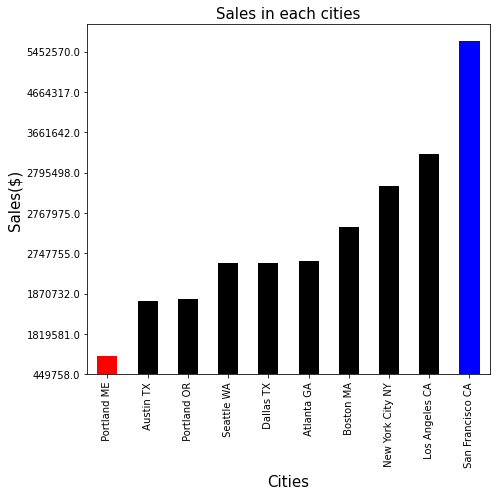

In [12]:
# Visualize

colors = list('rkkkkkkkkb')
ax = sales_sum_city.plot(kind='bar', x='city', y='sales', 
                         color=colors, figsize=(7,7), legend=None)
ax.set_xticklabels(sales_sum_city['city'])
ax.set_yticklabels(sales_sum_city['sales'])
ax.set_title('Sales of each cities')
plt.ylabel('Sales($)', fontsize=15)
plt.xlabel('Cities', fontsize=15)
plt.title('Sales in each cities', fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
#########################################################################
# # # 3. What time should we display advertisements to maximize likelihood of customers' buying product?

# Create new columns for date, hours and minutes
merged_file['Order Date'] = pd.to_datetime(merged_file['Order Date'])
merged_file['Hour'] = merged_file['Order Date'].dt.hour
merged_file['Minute'] = merged_file['Order Date'].dt.minute

In [14]:
# Create a new Dataframe only with Hour and Sales
sales_sum_hour = merged_file['sales'].groupby(merged_file['Hour']).sum().round(0)
sales_sum_hour = sales_sum_hour.to_frame()
sales_sum_hour = sales_sum_hour.reset_index(inplace=False)
sales_sum_hour['Hour'] = list(map(int, range(1,25)))
sales_sum_hour['sales'] = sales_sum_hour['sales'].astype('float')

In [15]:
sales_sum_hour

,Hour,sales
0,1,713721.0
1,2,460867.0
2,3,234851.0
3,4,145758.0
4,5,162661.0
5,6,230680.0
6,7,448113.0
7,8,744854.0
8,9,1192349.0
9,10,1639031.0


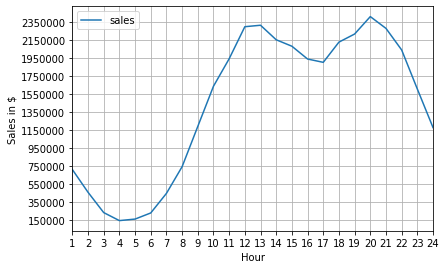

In [16]:
# Visualize using Line Plot

ax = sales_sum_hour.plot(kind='line', x='Hour', y='sales')
ax.set_xticks(sales_sum_hour['Hour'])
ax.set_yticks(list(map(float, range(150000, 2500000, 200000))))
plt.ylabel('Sales in $')
plt.tight_layout()
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()
plt.show()

In [17]:
merged_file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,city,state,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY,0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY,7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY,18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA,15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA,12,38
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA,MA,19,2
185946,222906,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City NY,NY,19,29
185947,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA,CA,18,57
185948,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA,CA,18,35


In [18]:
#########################################################################
# # # 4. What products are the most often sold together?
# bought on Same order ID == sold together

id_product = merged_file.loc[:, ['Order Date', 'Product']]
id_product = merged_file.loc[:, ['Order ID', 'Product']]

id_product

,Order ID,Product
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
...,...,...
185945,222905,AAA Batteries (4-pack)
185946,222906,27in FHD Monitor
185947,222907,USB-C Charging Cable
185948,222908,USB-C Charging Cable


In [19]:
id_product['Order ID'].nunique()

178437

In [20]:
# Create a new Dataframe with the 'Order ID' that have duplicates
id_duplicates = id_product[id_product['Order ID'].duplicated(keep=False)]
id_duplicates.sort_values(ascending=False, by='Order ID')
id_duplicates.reset_index(inplace=True)
id_duplicates = id_duplicates.drop(columns='index')
id_duplicates

,Order ID,Product
0,295681,Google Phone
1,295681,USB-C Charging Cable
2,295681,Bose SoundSport Headphones
3,295681,Wired Headphones
4,295698,Vareebadd Phone
...,...,...
14644,222882,AA Batteries (4-pack)
14645,222884,Google Phone
14646,222884,USB-C Charging Cable
14647,222903,iPhone


In [21]:
# One hot encoding
df_grouped = id_duplicates.groupby(['Order ID','Product'])['Product'].count().unstack().fillna(0).reset_index().set_index('Order ID')
df_grouped

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
141290,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
141384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
141450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
319556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [22]:
# I got the error "ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2.0" when I ran apriori() method
# Therefore, replace 2.0 to 1.0 since I'm only trying to find what products are bought together while I believe 2.0 exists when 2 same products
# were bought at the same time

for i in range(0, 7136):
    for j in range(0, 19):
        if df_grouped.values[i,j] == 2.0:
            df_grouped.values[i,j] = 1.0

In [23]:
pip install mlxtend

You should consider upgrading via the '/Users/kitaeklee/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


frequent_itemsets = apriori(df_grouped, min_support=0.01, use_colnames=True)


In [25]:
frequent_itemsets

,support,itemsets
0,0.021861,(20in Monitor)
1,0.034473,(27in 4K Gaming Monitor)
2,0.039938,(27in FHD Monitor)
3,0.033492,(34in Ultrawide Monitor)
4,0.102719,(AA Batteries (4-pack))
5,0.107483,(AAA Batteries (4-pack))
6,0.133128,(Apple Airpods Headphones)
7,0.111127,(Bose SoundSport Headphones)
8,0.024103,(Flatscreen TV)
9,0.229260,(Google Phone)


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [27]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AAA Batteries (4-pack)),(AA Batteries (4-pack)),0.107483,0.102719,0.012192,0.113429,1.104269,0.001151,1.012081
1,(AA Batteries (4-pack)),(AAA Batteries (4-pack)),0.102719,0.107483,0.012192,0.118690,1.104269,0.001151,1.012716
2,(Apple Airpods Headphones),(iPhone),0.133128,0.261351,0.052270,0.392632,1.502316,0.017477,1.216147
3,(iPhone),(Apple Airpods Headphones),0.261351,0.133128,0.052270,0.200000,1.502316,0.017477,1.083590
4,(Google Phone),(Bose SoundSport Headphones),0.229260,0.111127,0.031951,0.139364,1.254103,0.006474,1.032810
5,(Bose SoundSport Headphones),(Google Phone),0.111127,0.229260,0.031951,0.287516,1.254103,0.006474,1.081764
6,(Vareebadd Phone),(Bose SoundSport Headphones),0.084221,0.111127,0.011491,0.136439,1.227781,0.002132,1.029312
7,(Bose SoundSport Headphones),(Vareebadd Phone),0.111127,0.084221,0.011491,0.103405,1.227781,0.002132,1.021396
8,(USB-C Charging Cable),(Google Phone),0.289098,0.229260,0.139714,0.483277,2.107985,0.073436,1.491591
9,(Google Phone),(USB-C Charging Cable),0.229260,0.289098,0.139714,0.609413,2.107985,0.073436,1.820088


In [28]:
rules.loc[:, ['antecedents', 'consequents', 'confidence']].sort_values(by='confidence', ascending=False).reset_index().drop(columns='index')

,antecedents,consequents,confidence
0,(Vareebadd Phone),(USB-C Charging Cable),0.612313
1,(Google Phone),(USB-C Charging Cable),0.609413
2,(Lightning Charging Cable),(iPhone),0.570220
3,(iPhone),(Lightning Charging Cable),0.542091
4,(USB-C Charging Cable),(Google Phone),0.483277
5,"(Wired Headphones, USB-C Charging Cable)",(Google Phone),0.428571
6,(Apple Airpods Headphones),(iPhone),0.392632
7,(Bose SoundSport Headphones),(Google Phone),0.287516
8,(Wired Headphones),(iPhone),0.281879
9,(Google Phone),(Wired Headphones),0.257946


In [45]:
# # # 5. What products were sold the most?
merged_sum = merged_file.loc[:, ['Quantity Ordered', 'Product']]
merged_sum

,Quantity Ordered,Product
0,1.0,Macbook Pro Laptop
1,1.0,LG Washing Machine
2,1.0,USB-C Charging Cable
3,1.0,27in FHD Monitor
4,1.0,USB-C Charging Cable
...,...,...
185945,1.0,AAA Batteries (4-pack)
185946,1.0,27in FHD Monitor
185947,1.0,USB-C Charging Cable
185948,1.0,USB-C Charging Cable


In [56]:
# get the dataframe with total quantity ordered and group by products
merged_sum = merged_sum.groupby('Product').sum().sort_values(ascending=False, by='Quantity Ordered').reset_index()

In [57]:
merged_sum

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017.0
1,AA Batteries (4-pack),27635.0
2,USB-C Charging Cable,23975.0
3,Lightning Charging Cable,23217.0
4,Wired Headphones,20557.0
5,Apple Airpods Headphones,15661.0
6,Bose SoundSport Headphones,13457.0
7,27in FHD Monitor,7550.0
8,iPhone,6849.0
9,27in 4K Gaming Monitor,6244.0


In [70]:
# second dataframe with products and prices
merged_sum2 = merged_file.loc[:, ['Product','Price Each']].drop_duplicates().reset_index()
merged_sum2

,Product,Price Each
0,Macbook Pro Laptop,1700.00
1,LG Washing Machine,600.00
2,USB-C Charging Cable,11.95
3,27in FHD Monitor,149.99
4,AA Batteries (4-pack),3.84
5,Bose SoundSport Headphones,99.99
6,AAA Batteries (4-pack),2.99
7,ThinkPad Laptop,999.99
8,Lightning Charging Cable,14.95
9,Google Phone,600.00


In [125]:
# merge two dataframes for better result of merged plots
merged_sum12 = merged_sum.merge(merged_sum2, how='inner')
merged_sum12

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017.0,2.99
1,AA Batteries (4-pack),27635.0,3.84
2,USB-C Charging Cable,23975.0,11.95
3,Lightning Charging Cable,23217.0,14.95
4,Wired Headphones,20557.0,11.99
5,Apple Airpods Headphones,15661.0,150.00
6,Bose SoundSport Headphones,13457.0,99.99
7,27in FHD Monitor,7550.0,149.99
8,iPhone,6849.0,700.00
9,27in 4K Gaming Monitor,6244.0,389.99


Text(0, 0.5, 'Price($)')

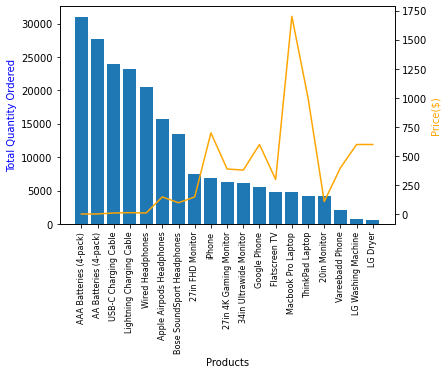

In [148]:
fig, ax1 = plt.subplots()
# create a twin Axes sharing the xaxis
ax2 = ax1.twinx()


ax1.bar(merged_sum12['Product'], merged_sum12['Quantity Ordered'])
ax1.set_xlabel('Products')
ax1.set_ylabel('Total Quantity Ordered', color='blue')
ax1.set_xticklabels(merged_sum12['Product'], rotation='vertical', size=8)

ax2.plot(merged_sum12['Product'], merged_sum12['Price Each'], color='orange')
ax2.set_ylabel('Price($)', color='orange')